**Table of contents**<a id='toc0_'></a>    
- [Time-series | Theory](#toc1_)    
  - [Time-series types](#toc1_1_)    
    - [From a statistical perspective](#toc1_1_1_)    
      - [Examples of non-stationary series](#toc1_1_1_1_)    
      - [**Why is stationarity important?**](#toc1_1_1_2_)    
      - [White noise](#toc1_1_1_3_)    
      - [Random Walk](#toc1_1_1_4_)    
      - [Random Walk Differencing](#toc1_1_1_5_)    
    - [From a prediction perspective](#toc1_1_2_)    
  - [Time-series models](#toc1_2_)    
  - [Time series elements](#toc1_3_)    
    - [Trend](#toc1_3_1_)    
    - [Seasonality](#toc1_3_2_)    
    - [Cyclicity](#toc1_3_3_)    
- [Time-series | Practice](#toc2_)    
  - [EDA | $CO_2$ levels in a room](#toc2_1_)    
    - [Data Wrangling](#toc2_1_1_)    
    - [Time series decomposition](#toc2_1_2_)    
    - [Autocorrelation](#toc2_1_3_)    
      - [Manual check](#toc2_1_3_1_)    
      - [Autocorrelation plot](#toc2_1_3_2_)    
      - [Statistical test (Augmented Dickey-Fuller)](#toc2_1_3_3_)    
  - [Curve Smoothing | Stock Prices](#toc2_2_)    
    - [Moving Average Smoothing](#toc2_2_1_)    
    - [Exponential Smoothing](#toc2_2_2_)    
  - [Classical Model | Air passenger prediction](#toc2_3_)    
    - [ARIMA family of models](#toc2_3_1_)    
      - [ARMA (Autoregressive Moving Average Model)](#toc2_3_1_1_)    
      - [ARIMA model (Autoregressive Integrated Moving Average Model)](#toc2_3_1_2_)    
      - [SARIMA model (Seasonal Autoregressive Moving Average Model)](#toc2_3_1_3_)    
      - [SARIMAX model (Seasonal Autoregressive Moving Average Model)](#toc2_3_1_4_)    
  - [Machine Learning Model | Stock Price Prediction](#toc2_4_)    
- [References](#toc3_)    
- [Extra](#toc4_)    
- [Acknowledgements](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# You know the drill
# !pip install statsmodels
# !pip install -q yfinance
# !pip install pmdarima --quiet
# !pip install tensorflow
# !pip install keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import yfinance as yf
import pmdarima as pm
import warnings

warnings.filterwarnings("ignore")
pio.templates.default = "simple_white"
px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody

# <a id='toc1_'></a>[Time-series | Theory](#toc0_)

![](https://media.giphy.com/media/NTMxntb8rMzmbd1x97/giphy.gif)

> Time series forecasting is exactly what it sounds like; predicting unknown values. Time series forecasting involves the collection of historical data, preparing it for algorithms to consume, and then predicting the future values based on patterns learned from the historical data.
> There are numerous reasons why companies may be interested in forecasting future values, namely GDP, monthly sales, inventory, unemployment, and global temperatures:
> - A retailer may be interested in <span style="color:orange">predicting future sales</span> at an SKU (stock keeping unit) level for planning and budgeting.
> - A small merchant may be interested in <span style="color:orange">forecasting sales</span> by store, so it can schedule the right resources (more people during busy periods and vice versa).
> - A software giant like Google may be interested in <span style="color:orange">knowing the busiest hour of the day or busiest day of the week</span> so that they can schedule server resources accordingly.
> - The health department may be interested in <span style="color:orange">predicting the cumulative COVID vaccinations administered</span> so that they can further predict when herd immunity is expected to kick in. [$^{[1]}$](https://www.datacamp.com/tutorial/tutorial-time-series-forecasting)

In short, time series forecasting allows us to **predict numerical continuous or discrete values in the future given historical data**.

## <a id='toc1_1_'></a>[Time-series types](#toc0_)

### <a id='toc1_1_1_'></a>[From a statistical perspective](#toc0_)

- **Stationary** - the time series doesn't change its statistical properties (mean and variance) and the points are not autocorrelated.
- **Non-stationary** - the time series changes any of its statistical properties (mean and variance) and/or the points are autocorrelated.

#### <a id='toc1_1_1_1_'></a>[Examples of non-stationary series](#toc0_)

**1. Mean changes over time**   
Green: Stationary series, Red: Non-stationary series  

![](https://habrastorage.org/files/20c/9d8/a63/20c9d8a633ec436f91dccd4aedcc6940.png)    
(Source: [Sean Abu](https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/))

**2. Variance changes over time**   
Green: Stationary series, Red: Non-stationary series  

![](https://habrastorage.org/files/b88/eec/a67/b88eeca676d642449cab135273fd5a95.png)  
(Source: [Sean Abu](https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/))


**3. Autocorrelation is present**   
Green: Stationary series, Red: Non-stationary series  
> - Finally, the covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice that the spread becomes closer as time increases. Hence, the covariance is not constant with time in the right chart. $^{[2]}$

![](https://habrastorage.org/files/2f6/1ee/cb2/2f61eecb20714352840748b826e38680.png)    
(Source: [Sean Abu](https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/))

#### <a id='toc1_1_1_2_'></a>[**Why is stationarity important?**](#toc0_)

TL;DR: It makes predictions easier.

> It is easy to make predictions on a stationary series since we can assume that the future statistical properties will not be different from those currently observed. Most of the time-series models, in one way or the other, try to predict those properties (mean or variance, for example). Future predictions would be wrong if the original series were not stationary. Unfortunately, most of the time series that we see outside of textbooks are non-stationary, but we can (and should) change this.

> So, in order to combat non-stationarity, we have to know our enemy, so to speak. White noise and random walks are useful to understanding how to convert a non-stationary time series into a stationary time series.

#### <a id='toc1_1_1_3_'></a>[White noise](#toc0_)

> A time series is white noise if the **variables are independent** and **identically distributed** with a **mean of zero**.
> 
> It is important in time series & forecasting for two main reasons:
> - **Predictability**: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
> - **Model Diagnostics**: The series of errors from a time series forecast model should ideally be white noise.[$^{[5]}$](https://machinelearningmastery.com/white-noise-time-series-python/)

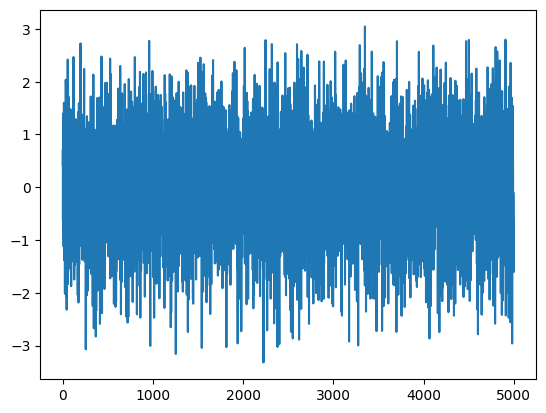

In [3]:
noise = np.random.normal(loc=0, scale=1, size=5000)
plt.plot(noise)
plt.show()

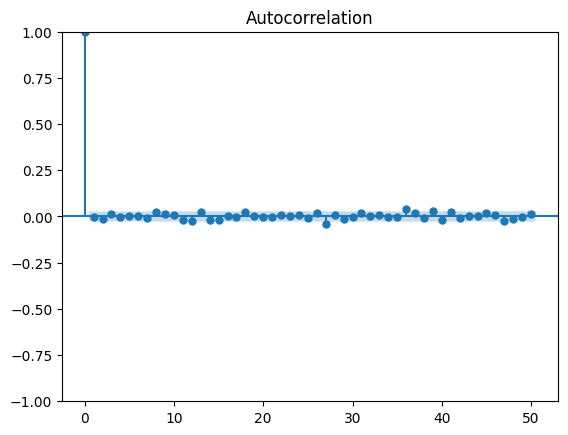

In [4]:
plot_acf(noise, lags=50, alpha=0.05)
plt.show()

#### <a id='toc1_1_1_4_'></a>[Random Walk](#toc0_)

A random walk is simply white noise with a starting point, i.e. points are autocorrelated.

![](https://upload.wikimedia.org/wikipedia/commons/2/28/Eight-step_random_walks.png)   
(Source: [Wikipedia](https://en.wikipedia.org/wiki/Random_walk))

> Random walks are an incredibly useful model for stochastic processes across many applications, such as modeling the **movement of particles through a fluid**, **the search path of a foraging animal**, or **changes in stock prices**. [$^{[6]}$](https://archive.ph/20211114104840/https://towardsdatascience.com/a-deep-dive-on-arima-models-8900c199ccf)

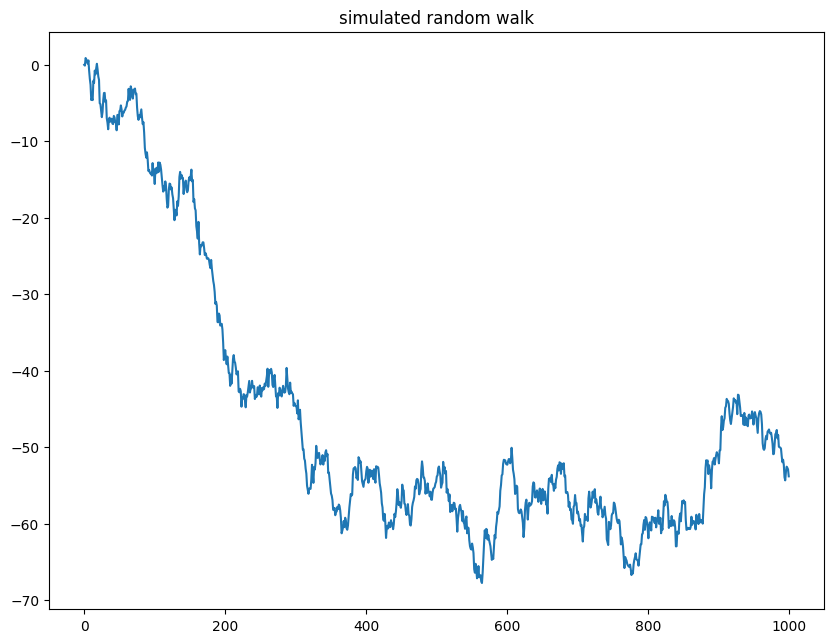

In [5]:
# draw samples from a standard Normal model distribution (mean=0, std=1)
points = np.random.standard_normal(1000) # kicks random walk (how it chooses to jump)

# simulate the random walk
points[0]=0
random_walk = np.cumsum(points)
plt.figure(figsize=(10, 7.5))
plt.plot(random_walk)
plt.title("simulated random walk")
plt.show()

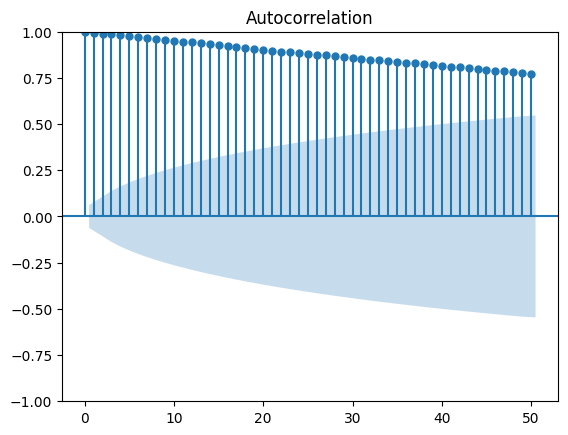

In [6]:
plot_acf(random_walk, lags=50, alpha=0.05)
plt.show()

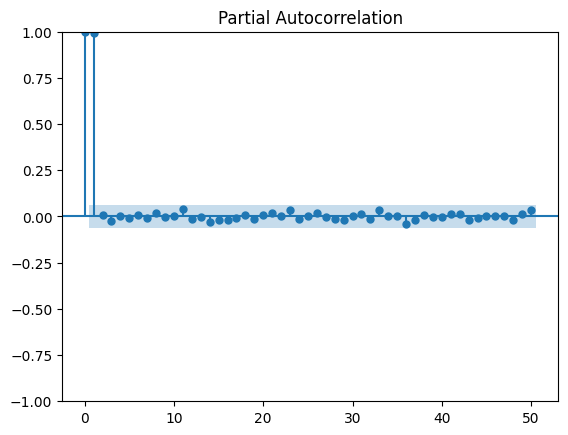

In [7]:
plot_pacf(random_walk, lags=50, alpha=0.05)
plt.show()

Is the random walk stationary?

#### <a id='toc1_1_1_5_'></a>[Random Walk Differencing](#toc0_)

In time series analysis, many times we aim to transform non-stationary series to stationary series. To do so, one of the common methods used is **differencing**:

In [8]:
random_walk_df = pd.DataFrame(random_walk, columns=['yesterday'])
random_walk_df['today'] = random_walk_df.shift(-1)
random_walk_df['difference'] = random_walk_df['today'] - random_walk_df['yesterday']
random_walk_df

,yesterday,today,difference
0,0.000000,-0.107988,-0.107988
1,-0.107988,0.881020,0.989008
2,0.881020,0.681570,-0.199450
3,0.681570,0.516575,-0.164995
4,0.516575,0.149819,-0.366756
...,...,...,...
995,-53.233345,-52.536562,0.696782
996,-52.536562,-52.683298,-0.146735
997,-52.683298,-52.886686,-0.203388
998,-52.886686,-53.799494,-0.912809


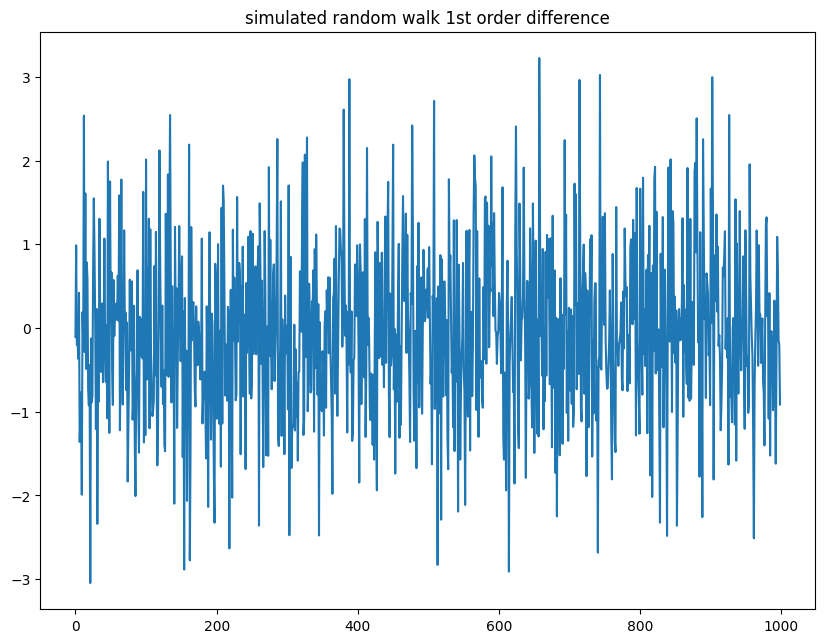

In [9]:
random_walk_diff = random_walk[1:] - random_walk[:-1]
plt.figure(figsize=(10, 7.5))
plt.plot(random_walk_diff)
plt.title("simulated random walk 1st order difference")
plt.show()

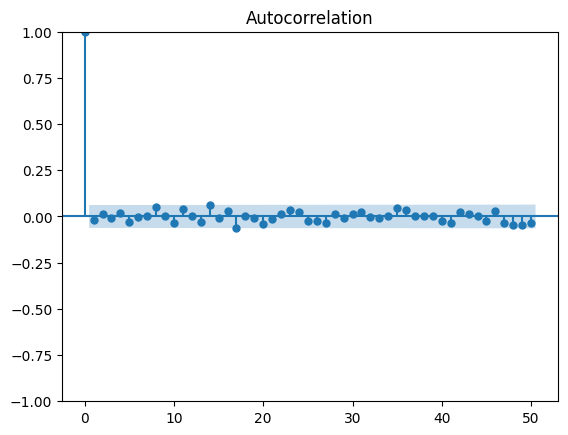

In [10]:
plot_acf(random_walk_diff, lags=50, alpha=0.05)
plt.show()

### <a id='toc1_1_2_'></a>[From a prediction perspective](#toc0_)

- **Univariate** - prediction based on one time-dependent variable (i.e. we extract features from the target data)
- **Multivariate** - prediction based on multiple time-dependent variable (i.e. we extract features from the target data and/or other time-dependent variables)

In **multivariate time series forecasting**, the input variables can be of two types:
- **Exogenous**: Input variables are independent from other input variables and they influence the output variable.
- **Endogenous**: Input variables are influenced by other input variables (dependent) and they influence the output variable.

This means there are 3 types of multivariate time series models: fully exogenous, fully endogenous, and mixed.

## <a id='toc1_2_'></a>[Time-series models](#toc0_)

> Time series forecasting can broadly be categorized into the following categories:
> - **Classical / Statistical Models** — Moving Averages, Exponential Smoothing, ARIMA, SARIMA, TBATS
> - **Machine Learning** — Linear Regression, XGBoost, Random Forest, or any ML model with reduction methods
> - **Deep Learning** — RNN, LSTM [$^{[1]}$](https://www.datacamp.com/tutorial/tutorial-time-series-forecasting)

## <a id='toc1_3_'></a>[Time series elements](#toc0_)

### <a id='toc1_3_1_'></a>[Trend](#toc0_)

> A trend exists when there is a **long-term increase or decrease** in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend. [$^{[3]}$](https://otexts.com/fpp2/tspatterns.html)

### <a id='toc1_3_2_'></a>[Seasonality](#toc0_)

> A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. **Seasonality is always of a fixed and known frequency**.[$^{[3]}$](https://otexts.com/fpp2/tspatterns.html)

### <a id='toc1_3_3_'></a>[Cyclicity](#toc0_)

> A cycle occurs **when the data exhibit rises and falls that are not of a fixed frequency**. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years. [$^{[3]}$](https://otexts.com/fpp2/tspatterns.html)

![](https://otexts.com/fpp2/fpp_files/figure-html/fourexamples-1.png)  
(Source: [OTexts](https://otexts.com/fpp2/tspatterns.html))

# <a id='toc2_'></a>[Time-series | Practice](#toc0_)

## <a id='toc2_1_'></a>[EDA | $CO_2$ levels in a room](#toc0_)

Today we'll be looking at a room occupancy dataset, which contains meta-data about the room (temperature, humidity, light, $CO_2$) and whether there was a person in the room or not (occupancy):

In [11]:
occupancy = pd.read_csv('https://raw.githubusercontent.com/sabinagio/data-analytics/main/data/occupancy.csv')
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


### <a id='toc2_1_1_'></a>[Data Wrangling](#toc0_)

As we'll explore time series, we will correctly format the dates and use them as the index for our dataframe:

In [12]:
occupancy['date'] = pd.to_datetime(occupancy['date'])
occupancy.index = pd.DatetimeIndex(occupancy['date'], freq='H')
occupancy.drop('date', axis=1, inplace=True) # do not run this twice
display(occupancy.head())

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


Now let's review what we can model:

In [13]:
plotly_df = occupancy.stack().reset_index().rename({'level_1': 'metric', 0: 'value'}, axis=1)
fig = px.line(plotly_df, x='date', y='value', facet_row='metric')
# Have the y-axis adjust for each plot independently
fig.update_yaxes(matches=None, title='')

# Remove pattern=pattern from the y-axis label
fig.for_each_annotation(lambda annot: annot.update(text=annot.text.split("=")[-1]))

# Hide tick marks
fig.update_xaxes(ticks='')

# Follow previous aesthetics
fig.update_traces(line_color='black')
fig.update_layout(height=600, width=700)
fig.show()

### <a id='toc2_1_2_'></a>[Time series decomposition](#toc0_)

We can extract the trend and seasonality of our time series using the `statsmodel` library:

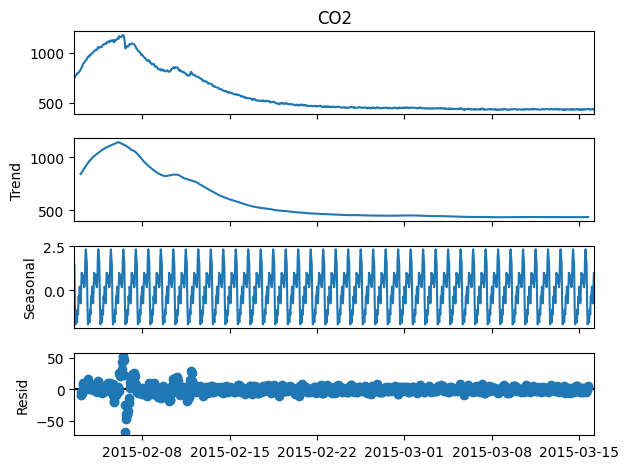

In [14]:
decomp = sm.tsa.seasonal_decompose(occupancy['CO2'][:1000])
decomp.plot()
plt.show()

While `matplotlib` is decent for a basic chart, I'd like to display my data using `plotly` instead. However, for that I need to do some data wrangling with my time series:

In [15]:
decomp_df = pd.concat([decomp.trend, decomp.seasonal, decomp.resid], axis=1)
decomp_df.head(20)

,trend,seasonal,resid
date,,,
2015-02-02 14:00:00,NaN,1.461892,NaN
2015-02-02 15:00:00,NaN,-0.767842,NaN
2015-02-02 16:00:00,NaN,-1.966758,NaN
2015-02-02 17:00:00,NaN,-1.740809,NaN
2015-02-02 18:00:00,NaN,-1.540930,NaN
2015-02-02 19:00:00,NaN,-1.848781,NaN
2015-02-02 20:00:00,NaN,-1.122870,NaN
2015-02-02 21:00:00,NaN,-1.398197,NaN
2015-02-02 22:00:00,NaN,-0.362817,NaN


To show 3 lines in the same figure or chart using `plotly.express`, my data needs to have the features (trend, seasonality, and residuals) in a separate column:

In [16]:
decomp_df = decomp_df.stack().reset_index(name='value').rename({'level_1': 'pattern'}, axis=1)
decomp_df

,date,pattern,value
0,2015-02-02 14:00:00,seasonal,1.461892
1,2015-02-02 15:00:00,seasonal,-0.767842
2,2015-02-02 16:00:00,seasonal,-1.966758
3,2015-02-02 17:00:00,seasonal,-1.740809
4,2015-02-02 18:00:00,seasonal,-1.540930
...,...,...,...
2947,2015-03-16 01:00:00,seasonal,-0.006585
2948,2015-03-16 02:00:00,seasonal,-0.761753
2949,2015-03-16 03:00:00,seasonal,0.171047
2950,2015-03-16 04:00:00,seasonal,0.990187


In [17]:
fig = px.line(decomp_df, x='date', y='value', facet_row='pattern', title='CO2 level')

# Have the y-axis adjust for each plot independently
fig.update_yaxes(matches=None, title='')

# Remove pattern=pattern from the y-axis label
fig.for_each_annotation(lambda annot: annot.update(text=annot.text.split("=")[-1]))

# Hide tick marks
fig.update_xaxes(ticks='')

# Follow previous aesthetics
fig.update_traces(line_color='black')
fig.update_layout(height=600, width=700)
fig.show()

### <a id='toc2_1_3_'></a>[Autocorrelation](#toc0_)

> Autocorrelation measures the relationship between a variable's current value and its past values. [$^{[4]}$](https://www.investopedia.com/terms/a/autocorrelation.asp)

#### <a id='toc2_1_3_1_'></a>[Manual check](#toc0_)

In [18]:
# Present hour values
occupancy['CO2'][:-1]

date
2015-02-02 14:00:00     749.200000
2015-02-02 15:00:00     760.400000
2015-02-02 16:00:00     769.666667
2015-02-02 17:00:00     774.750000
2015-02-02 18:00:00     779.000000
                          ...     
2015-05-24 08:00:00    1140.800000
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
Freq: h, Name: CO2, Length: 2663, dtype: float64

In [19]:
# Past hour values
occupancy['CO2'][1:]

date
2015-02-02 15:00:00     760.400000
2015-02-02 16:00:00     769.666667
2015-02-02 17:00:00     774.750000
2015-02-02 18:00:00     779.000000
2015-02-02 19:00:00     790.000000
                          ...     
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
2015-05-24 13:00:00    1124.000000
Freq: h, Name: CO2, Length: 2663, dtype: float64

In [20]:
fig = px.scatter(x=occupancy['CO2'][1:], y=occupancy['CO2'][:-1], title='CO2 levels autocorrelation')
fig.update_xaxes(title='Past hour')
fig.update_yaxes(title='Present hour')
fig.update_traces(opacity=0.5)
fig.show()

#### <a id='toc2_1_3_2_'></a>[Autocorrelation plot](#toc0_)

Simple autocorrelation:

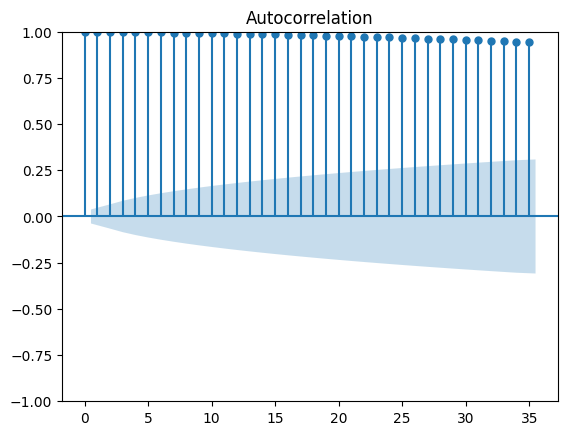

In [21]:
plot_acf(occupancy['CO2'], alpha=0.05)
plt.show()

Partial autocorrelation:

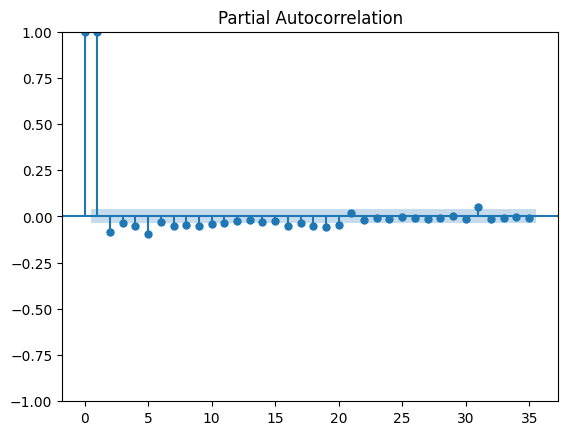

In [22]:
plot_pacf(occupancy['CO2'], alpha=0.05)
plt.show()

After differencing the CO2 levels:

In [23]:
# Extract the first order difference between CO2 levels
lvl_changes = ((occupancy['CO2'] - occupancy['CO2'].shift(1))/occupancy['CO2'].shift(1)).dropna()
lvl_changes

date
2015-02-02 15:00:00    0.014949
2015-02-02 16:00:00    0.012187
2015-02-02 17:00:00    0.006605
2015-02-02 18:00:00    0.005486
2015-02-02 19:00:00    0.014121
                         ...   
2015-05-24 09:00:00    0.008284
2015-05-24 10:00:00   -0.018300
2015-05-24 11:00:00   -0.003011
2015-05-24 12:00:00   -0.002487
2015-05-24 13:00:00    0.000890
Freq: h, Name: CO2, Length: 2663, dtype: float64

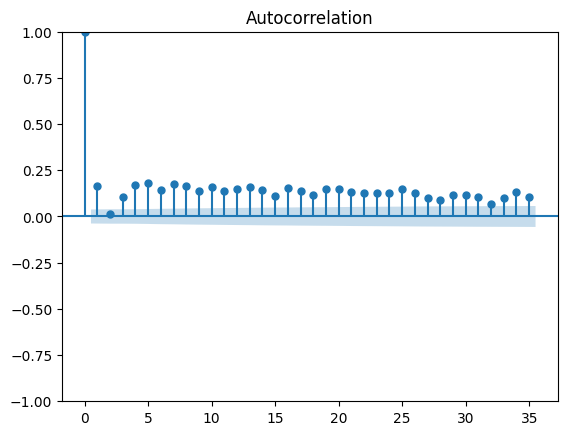

In [24]:
plot_acf(lvl_changes, alpha=0.05)
plt.show()

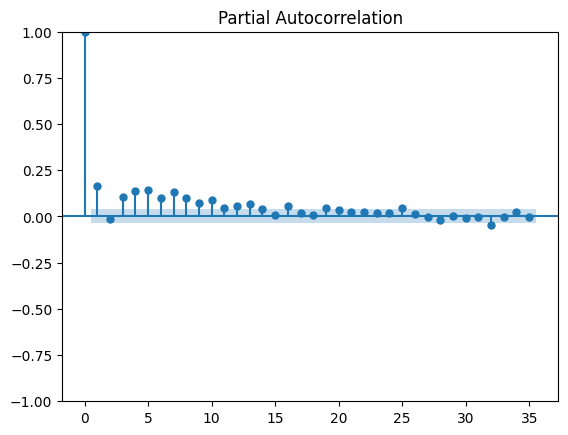

In [25]:
plot_pacf(lvl_changes, alpha=0.05)
plt.show()

#### <a id='toc2_1_3_3_'></a>[Statistical test (Augmented Dickey-Fuller)](#toc0_)

- Null Hypothesis $H_0$ = Time series is not stationary
- Alternative Hypothesis $H_1$ = Time series is stationary

In [26]:
# function source: https://archive.ph/20220324144523/https://towardsdatascience.com/why-does-stationarity-matter-in-time-series-analysis-e2fb7be74454#selection-919.361-937.115
def ADF_Cal(x):
    result = adfuller(x, autolag='AIC')
    ADF_stat = result[0]
    p = result[1]
    print("ADF Statistic: %f" % ADF_stat)
    print("p-value: %f" % p)
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print("{}% certain this is stationary".format(cert))
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))

In [27]:
print("Calculating ADF test for X...")
ADF_Cal(occupancy['CO2'])

Calculating ADF test for X...
ADF Statistic: -2.734684
p-value: 0.068226
Critical Values
	1%: -3.433
	5%: -2.863
	10%: -2.567
90.0% certain this is stationary
Reject H0: True


In [28]:
print("Calculating ADF test for X...")
ADF_Cal(lvl_changes)

Calculating ADF test for X...
ADF Statistic: -4.896296
p-value: 0.000035
Critical Values
	1%: -3.433
99.0% certain this is stationary
Reject H0: True


## <a id='toc2_2_'></a>[Curve Smoothing | Stock Prices](#toc0_)

In [29]:
# Get data from Yahoo Finance
apple_df = yf.download('AAPL', start='2012-06-01', end='2022-06-30')
apple_df.head()

Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


In [32]:
# If the above doesn't work
apple_df = pd.read_csv("https://raw.githubusercontent.com/sabinagio/data-analytics/main/data/AAPL.csv")
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-06-01,20.327143,20.451786,20.018572,20.035357,17.005938,520987600
1,2012-06-04,20.053572,20.267857,19.589287,20.153214,17.105980,556995600
2,2012-06-05,20.045357,20.231071,19.940357,20.101070,17.061720,388214400
3,2012-06-06,20.277500,20.494642,20.196428,20.409286,17.323326,401455600
4,2012-06-07,20.617500,20.618570,20.375000,20.418571,17.331215,379766800


In [33]:
apple_df["open_mean"]= apple_df["Open"].mean()

fig = px.line(x= apple_df.index, y= apple_df["Open"])
fig.add_trace(px.line(x= apple_df.index, y= apple_df["open_mean"]).data[0])
fig.show()

### <a id='toc2_2_1_'></a>[Moving Average Smoothing](#toc0_)

In [34]:
y = apple_df["Open"]
MA7 = y.rolling(window=7)
apple_df["Open_MA_7"]= MA7.mean()

In [35]:
fig = px.line(x=apple_df.index, y= apple_df.Open)
fig.add_trace(px.line(x=apple_df.index, y= apple_df["Open_MA_7"]).data[0])
fig["data"][1]["line"]["color"]= "#4BE8E0"
fig.show()

### <a id='toc2_2_2_'></a>[Exponential Smoothing](#toc0_)

MA = sum(data_points_in_a_window) / window_size

Y(t) = alpha * Y(t) + (1-alpha) * Y(t-1)  
Y(t-1) = alpha * Y(t-1) + (1-alpha) * Y(t-2)  

Y(t) =  alpha * Y(t) + (1-alpha) * alpha * Y(t-1) +  (1-alpha) * (1 - alpha) * Y(t-2)

Y(t) = 0.1 * Y(t) + 0.09 * Y(t-1) + 0.81 * Y(t-1)

In [36]:
SES = SimpleExpSmoothing(apple_df["Open"])
SES_fit = SES.fit(0.1)
SES_predict = SES_fit.predict(start=0, end=len(apple_df) + 30)

fig = px.line(x=range(len(apple_df)), y= apple_df["Open"])
fig.add_trace(px.line(x=SES_predict.index, y= SES_predict).data[0])
fig["data"][1]["line"]["color"]= "#4BE8E0"
fig.show()

## <a id='toc2_3_'></a>[Classical Model | Air passenger prediction](#toc0_)

In [37]:
passengers = pd.read_csv("https://raw.githubusercontent.com/sabinagio/data-analytics/main/data/AirPassengers.csv")
passengers

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [38]:
passengers['Month'] = pd.to_datetime(passengers['Month'])
passengers.index = pd.DatetimeIndex(passengers['Month'], freq='MS')
passengers.drop('Month', axis=1, inplace=True) # do not run this twice
display(passengers.head())

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [39]:
fig = px.line(x=passengers.index, y= passengers["#Passengers"])
fig.show()

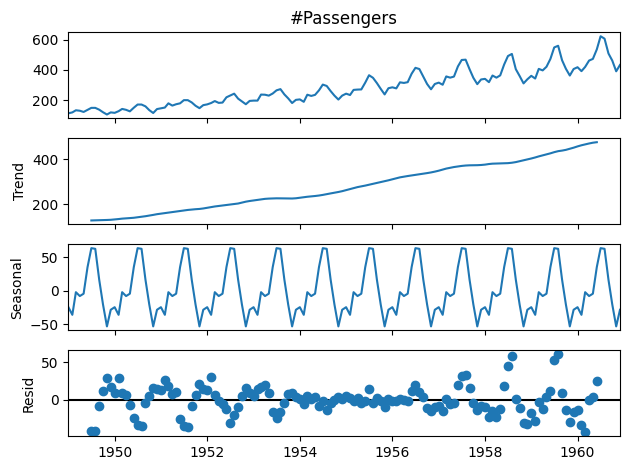

In [40]:
decomp = sm.tsa.seasonal_decompose(passengers['#Passengers'][:1000])
decomp.plot()
plt.show()

### <a id='toc2_3_1_'></a>[ARIMA family of models](#toc0_)

#### <a id='toc2_3_1_1_'></a>[ARMA (Autoregressive Moving Average Model)](#toc0_)

> **ARMA = AR(p) + MA(q)**
> * **AR(p)**: autoregressive component that actually assumes that the current state of the series depends on its previous values with some lag p (the maximum period, or how far back a model looks to figure out the prediction) $^{[2]}$

![](https://miro.medium.com/max/1400/1*8If_nqKxNbzd3JPZAXICVg.png) 
(Source: [Medium](https://miro.medium.com/max/1400/1*8If_nqKxNbzd3JPZAXICVg.png))  

> * **MA(q)**: moving average component with q lagged forecasting error terms in the prediction. $^{[2]}$

#### <a id='toc2_3_1_2_'></a>[ARIMA model (Autoregressive Integrated Moving Average Model)](#toc0_)

> **ARIMA = AR(p) + I(d) + MA(q)**
> * **I(d)**: to model the number of non-seasonal differences needed to make the series stationary $^{[2]}$

In [41]:
# standard ARIMA model
ARIMA_model = pm.auto_arima(passengers["#Passengers"],
                           start_p=1,
                           start_q=1,
                           test="adf",
                           max_p=3, max_q=3,
                           m=1, # frequency of the series if m==1 seasonal is set to FALSE automatically
                           d=None, # parameter that the algo will look for
                           seasonal=False, # no seasonality for std arima
                           trace=False, #logs
                           error_action="warn",
                           suppress_warnings=True,
                           stepwise=True)

print(ARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -699.125
Date:                Tue, 04 Mar 2025   AIC                           1408.249
Time:                        21:03:01   BIC                           1423.098
Sample:                    01-01-1949   HQIC                          1414.283
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.6007     12.051      1.627      0.104      -4.018      43.219
ar.L1          0.4990      0.131      3.822      0.000       0.243       0.755
ar.L2          0.4314      0.124      3.466      0.0

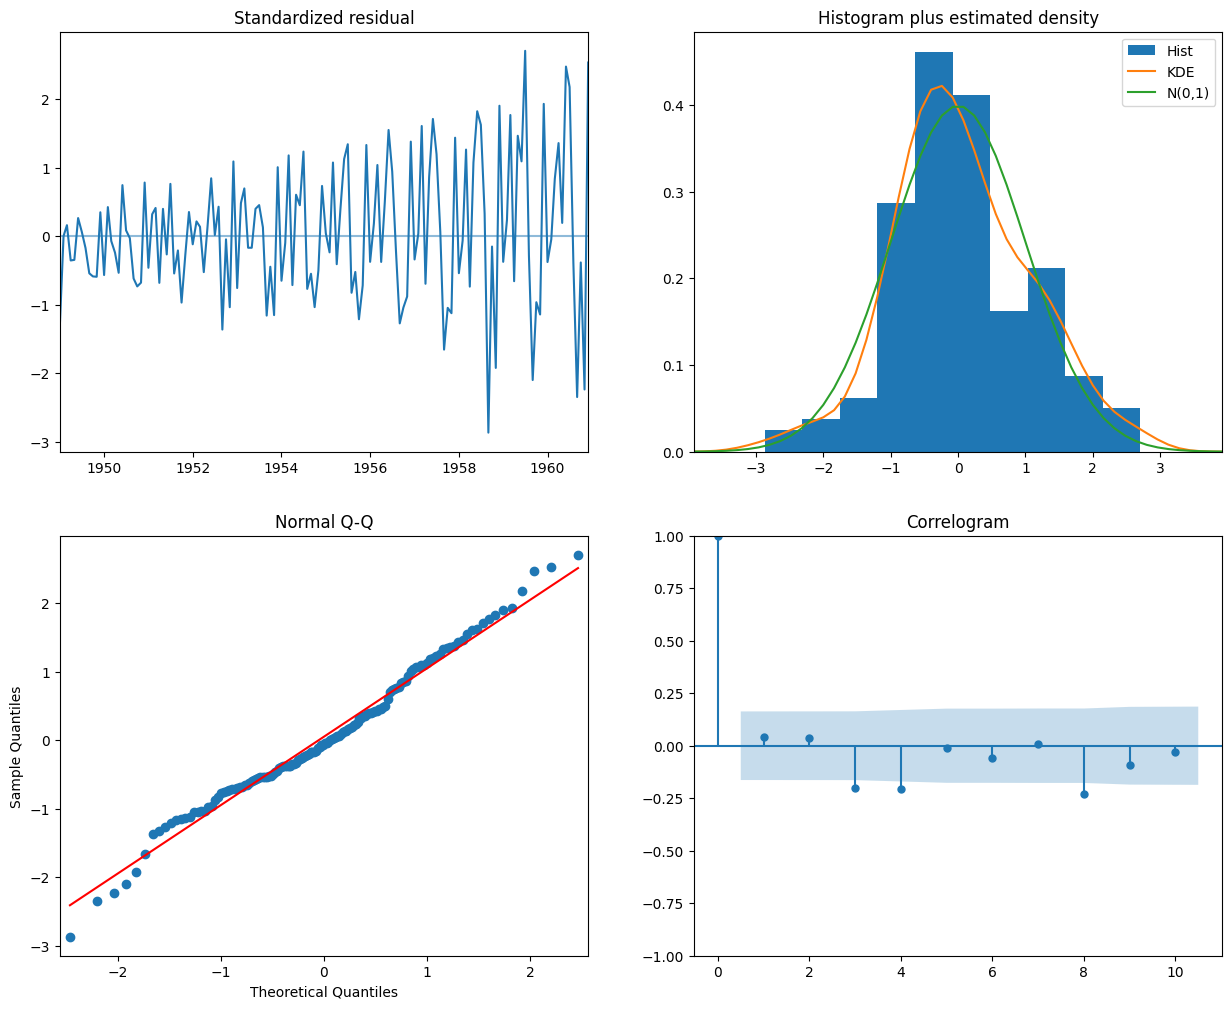

In [42]:
# diagnostics
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [43]:
def forecast(ARIMA_model, n_periods=24):
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(passengers.index[-1]+pd.DateOffset(months=1), periods=n_periods, freq="MS")

    # make the series for the plot
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:,0], index=index_of_fc)
    upper_series = pd.Series(confint[:,1], index=index_of_fc)


    #plot
    plt.figure(figsize=(15, 7))
    plt.plot(passengers["#Passengers"], color="#1f76b4")
    plt.plot(fitted_series, color="darkgreen")
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color = "k",
                     alpha =.15)
    plt.title("ARIMA-Forecast Air Passengers")
    plt.show()

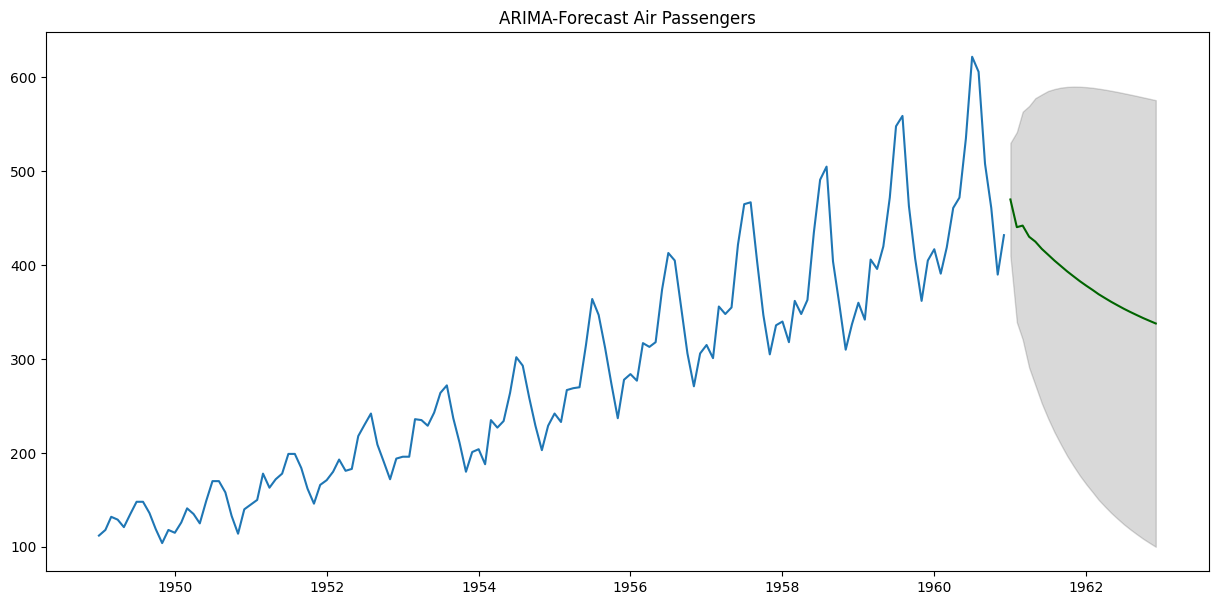

In [44]:
forecast(ARIMA_model, n_periods=24)

#### <a id='toc2_3_1_3_'></a>[SARIMA model (Seasonal Autoregressive Moving Average Model)](#toc0_)
> **SARIMA = S(s) + AR(p) + MA(q) + I(d)**
> * **S(s)**: responsable for the seasonality and equals the season period length of the series $^{[2]}$

In [45]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(passengers['#Passengers'], start_p=1, start_q=1,
                         test="adf",
                         max_p=3, max_q=3,
                         m=12, #12 is the frequncy of the cycle
                         start_P=0,
                         seasonal=True, #set to seasonal
                         d=None,
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action="ignore",
                         suppress_warnings=True,
                         stepwise=True)

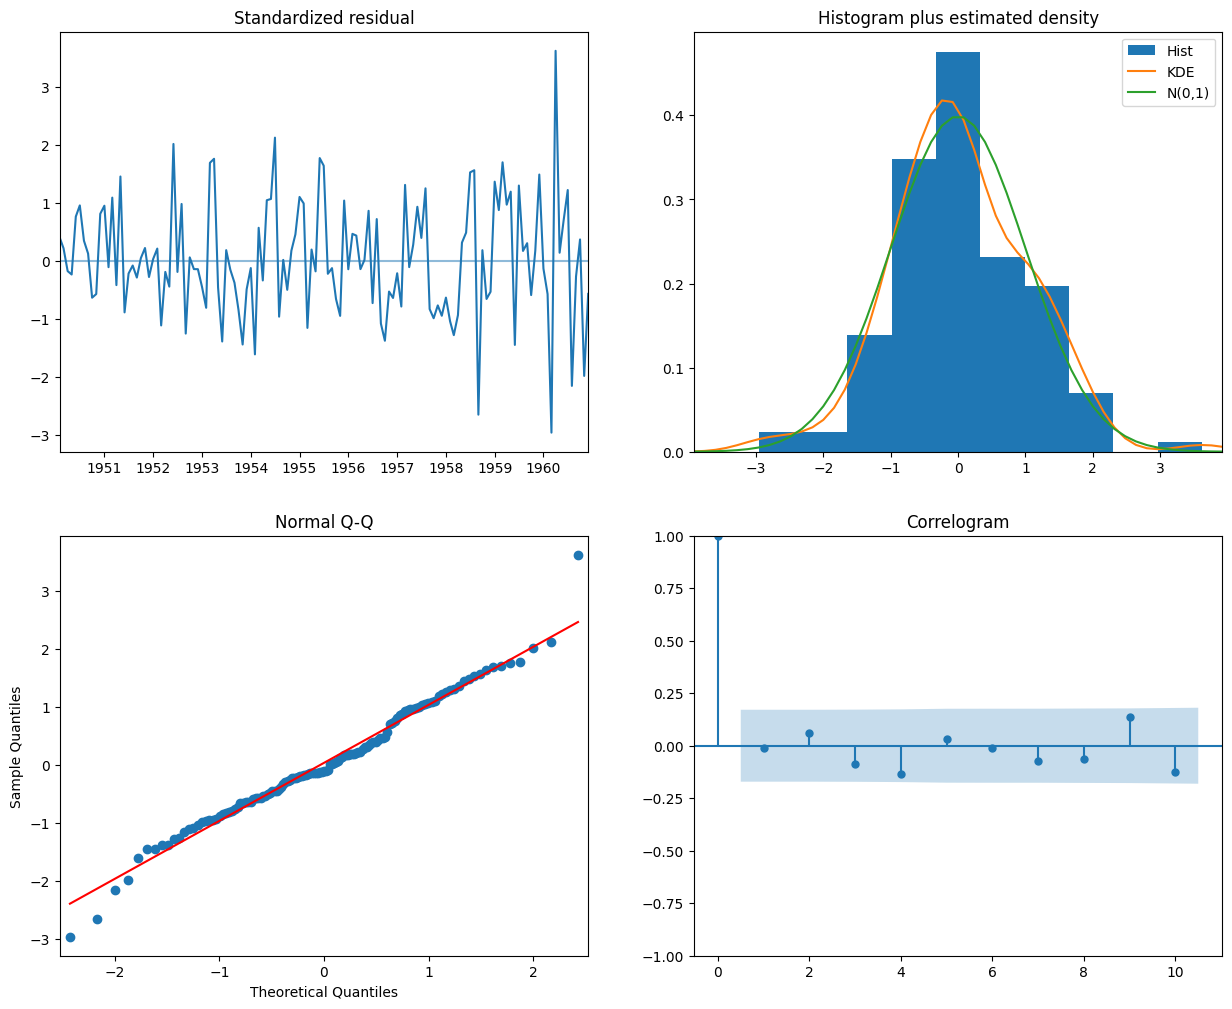

In [46]:
SARIMA_model.plot_diagnostics(figsize=(15, 12))
plt.show()

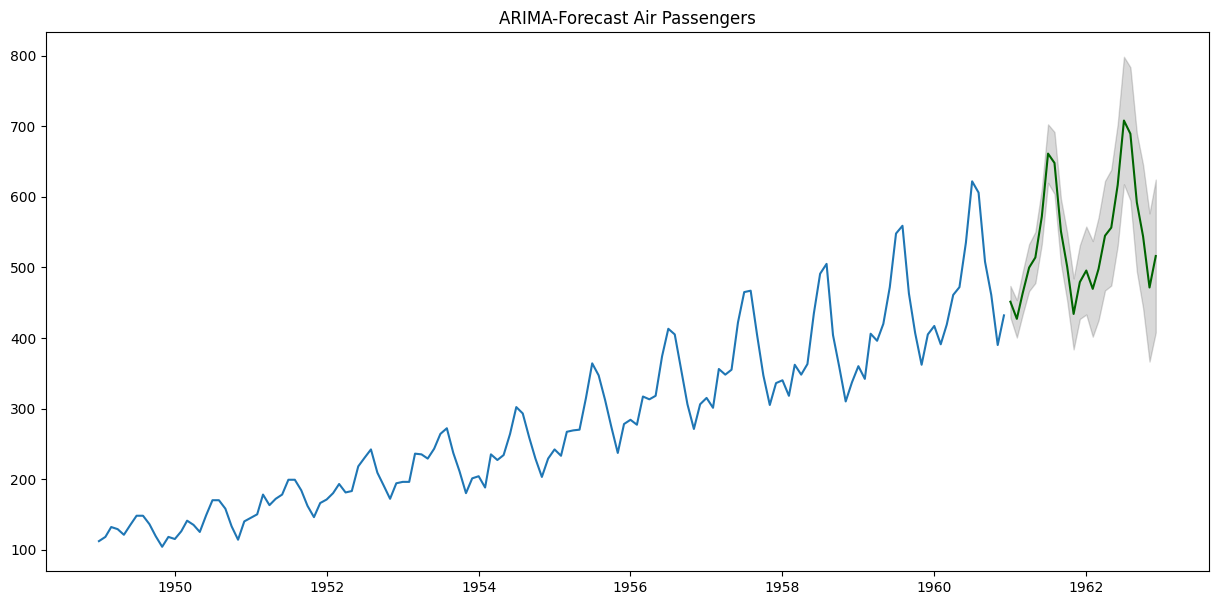

In [47]:
forecast(SARIMA_model)

#### <a id='toc2_3_1_4_'></a>[SARIMAX model (Seasonal Autoregressive Moving Average Model with Exogenous Factors)](#toc0_)
> **SARIMAX = S(s) + AR(p) + MA(q) + I(d) + X(t)**
> * **X**: eXogenous variable $^{[2]}$

In [48]:
#adding exogenous variable
passengers['month_index'] = passengers.index.month
passengers

,#Passengers,month_index
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


In [49]:
# SARIMAX Model
SARIMAX_model = pm.auto_arima(passengers[['#Passengers']], exogenous=passengers[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

SARIMAX_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 04 Mar 2025   AIC                           1019.178
Time:                                     21:03:13   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We can see that similar to the SARIMA model we are getting some pretty good-looking predictions and the width of the forecasted confidence interval has decreased. This means that the model is more certain of its predictions.

In [50]:
def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods
    forecast_passengers = pd.DataFrame({"month_index":pd.date_range(passengers.index[-1], periods = n_periods, freq="MS").month},
                    index = pd.date_range(passengers.index[-1]+ pd.DateOffset(months=1), periods = n_periods, freq="MS"))
    fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
                                            return_conf_int=True,
                                            exogenous=forecast_passengers[["month_index"]])
    index_of_fc = pd.date_range(passengers.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq="MS")
    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(passengers["#Passengers"], color="#1F76B4")
    plt.plot(fitted_series, color="darkgreen")
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color="k", alpha=.15)
    plt.title("SARIMAX - Forecast of Airline Passengers")
    plt.show()

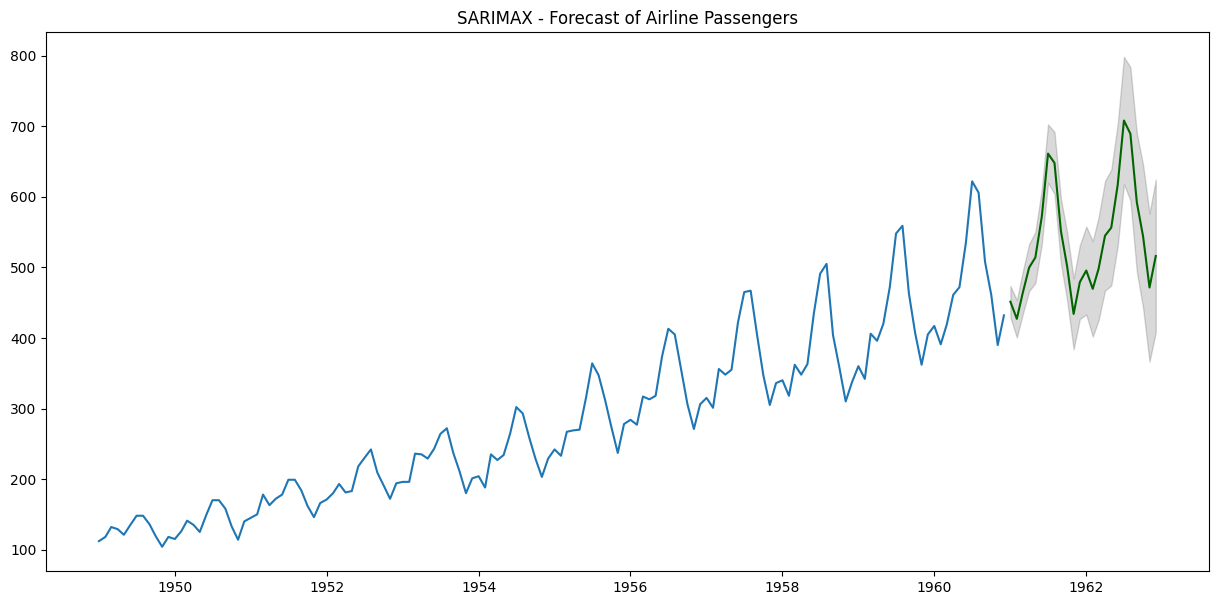

In [51]:
sarimax_forecast(SARIMAX_model, periods=24)

## <a id='toc2_4_'></a>[Deep Learning Model | Stock Price Prediction](#toc0_)

Following code adapted from [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/12/stock-price-prediction-using-lstm/):

In [52]:
apple_df_pred = apple_df[['Open', 'Close']]
apple_df_pred.head()

,Open,Close
0,20.327143,20.035357
1,20.053572,20.153214
2,20.045357,20.101070
3,20.277500,20.409286
4,20.617500,20.418571


In [53]:
scaler = MinMaxScaler(feature_range=(0, 1))
apple_df_scaled = scaler.fit_transform(apple_df_pred)

In [54]:
training_size = round(len(apple_df_scaled) * 0.80)
train_data = apple_df_scaled[:training_size]
test_data  = apple_df_scaled[training_size:]

In [55]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50, len(dataset)): 
    sequences.append(dataset[start_idx:stop_idx])
    labels.append(dataset[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [56]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

ModuleNotFoundError: No module named 'keras'

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

In [ ]:
model.fit(train_seq, train_label, epochs=20, validation_data=(test_seq, test_label), verbose=1)
test_predicted = model.predict(test_seq)

In [ ]:
test_inverse_predicted = scaler.inverse_transform(test_predicted)

In [ ]:
# Merging actual and predicted data for better visualization
apple_pred_data = pd.concat([apple_df.iloc[-457:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=apple_df .iloc[-457:].index)], axis=1)
apple_pred_data.head()

In [ ]:
open_plot_data = apple_pred_data[['Open', 'open_predicted']].stack().reset_index().rename({'level_1': 'Measure', 0: 'Value'}, axis=1)
close_plot_data = apple_pred_data[['Close', 'close_predicted']].stack().reset_index().rename({'level_1': 'Measure', 0: 'Value'}, axis=1)

In [ ]:
px.line(open_plot_data, x='Date', color='Measure', y='Value')

In [ ]:
px.line(close_plot_data, x='Date', color='Measure', y='Value')

# <a id='toc3_'></a>[References](#toc0_)

Unless otherwise cited, the quoted paragraphs belong to David Henriques.

[1] [Time Series Forecasting, DataCamp](https://www.datacamp.com/tutorial/tutorial-time-series-forecasting)  
[2] Time Series Crash Course (Ironhack July 2022 RMT PT bootcamp resources), Andre Oliveira Gomez    
[3] [Time series patterns, OTexts](https://otexts.com/fpp2/tspatterns.html)  
[4] [Autocorrelation, Investopedia](https://www.investopedia.com/terms/a/autocorrelation.asp)  
[5] [White Noise, Machine Learning Mastery](https://machinelearningmastery.com/white-noise-time-series-python/)  
[6] [A Deep Dive on ARIMA models, Towards Data Science](https://archive.ph/20211114104840/https://towardsdatascience.com/a-deep-dive-on-arima-models-8900c199ccf)

# <a id='toc4_'></a>[Extra](#toc0_)

Want to go deeper into time series models?
- [ARIMA & SARIMA Real World Time Series Forecasting, Neptune AI](https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide)

If you want to learn about deep learning time series models:
- [RNNs - StatQuest (17 mins)](https://www.youtube.com/watch?v=AsNTP8Kwu80)
- [LSTMs - StatQuest (21 mins)](https://www.youtube.com/watch?v=YCzL96nL7j0)

If you're interested in algorithmic trading:
- [PyQuant newsletter](https://pyquantnews.com/the-pyquant-newsletter/)

# <a id='toc5_'></a>[Acknowledgements](#toc0_)

Thank you, Andre de Oliveira Gomes for your awesome lessons and resources on time series.